In [1]:
import numpy as np 
from pathlib import Path
from src import db, fig2, utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 12
fs_title = 14
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange'] #rew #nrew #rew_test #nrew_test #GI
from IPython.display import clear_output

In [2]:
areas = ["V1", "medial", "lateral", "anterior"]
ctypes = ["exc", "inh"]
corridor_length = 400

dbase = db.get_sessions()
all_first = dbase.query("session == 'all rewarded before'").reset_index(drop=True)
all_last = dbase.query("session == 'all rewarded after'").reset_index(drop=True)

In [3]:
zscored = True
if zscored == True:
    main_dir = Path("../data/overall")
else:
    main_dir = Path("../data/notz/overall")
correct_incorrect = np.load(main_dir/"last_training"/"correct_incorrect_cds_updated.npy")
all_first = np.load(main_dir/"all_first"/"cod_dirs_0_100_updated.npy")
all_last = np.load(main_dir/"all_last"/"cod_dirs_0_100_updated.npy")
gis_all_first,_,_ = fig2.compute_gi(all_first, 100)
gis_all_last,_,_ = fig2.compute_gi(all_last, 100)
correct = correct_incorrect[:, :, :, :, 0, :]
incorrect = correct_incorrect[:, :, :, :, 1, :]

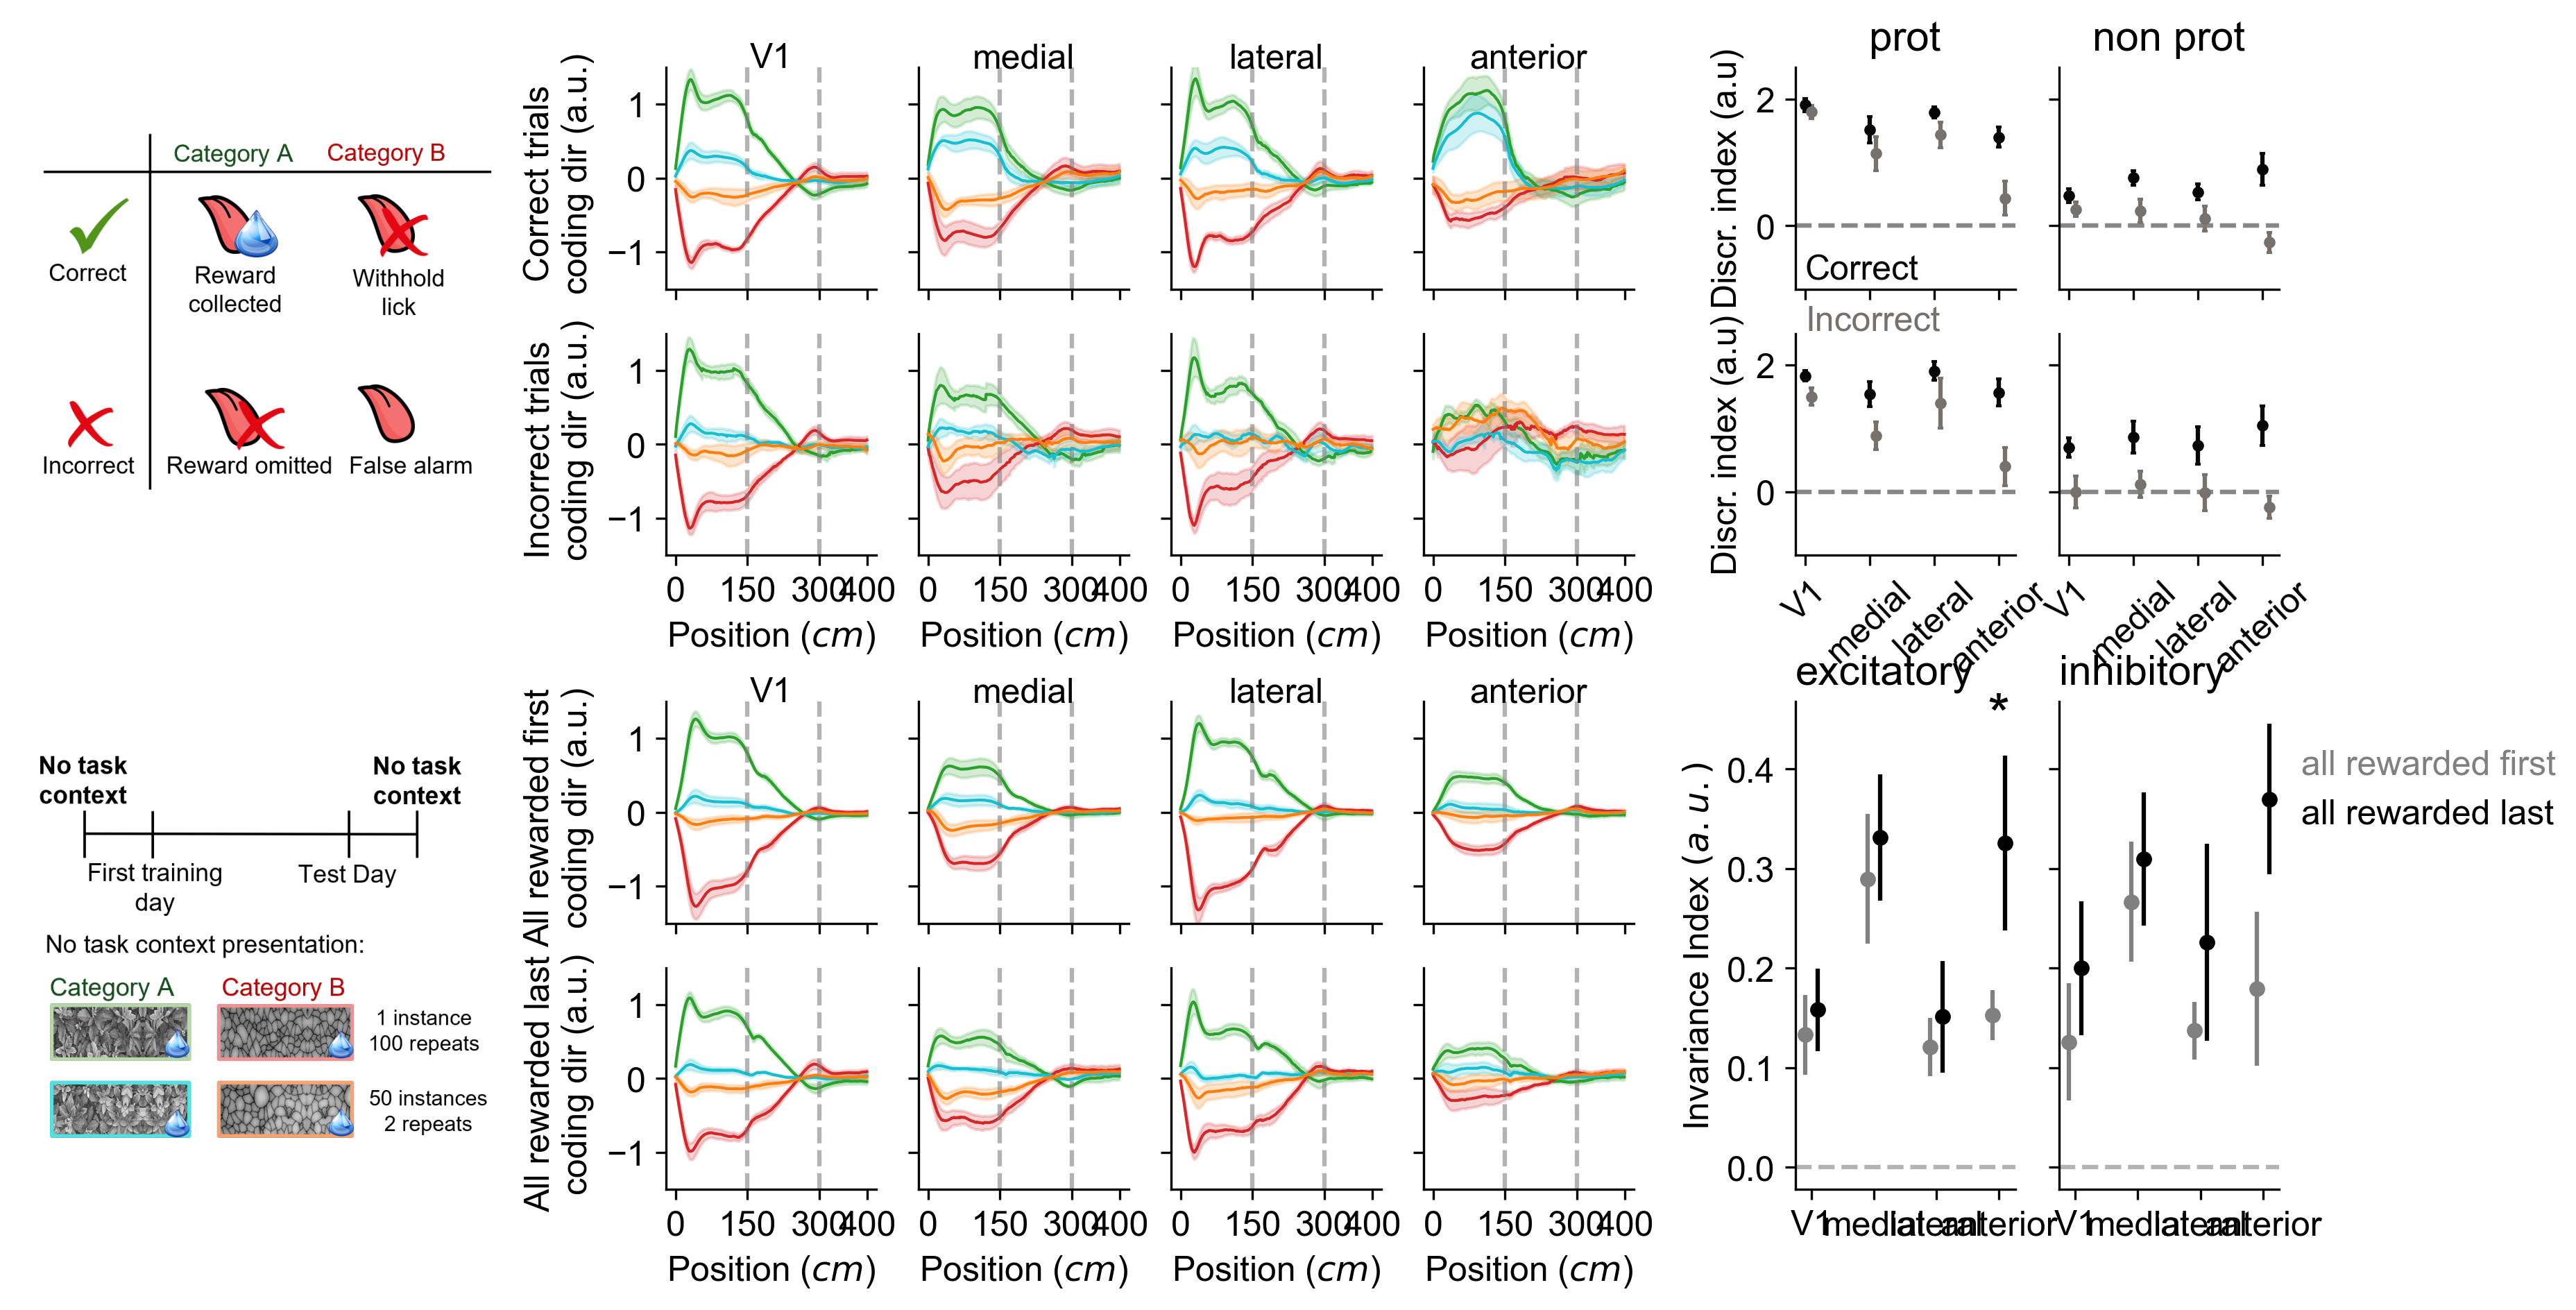

In [4]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(14, 7), dpi=300)
grid = GridSpec(2, 8, wspace=0.4, hspace=0.3, figure=fig)
row1  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[0,:], width_ratios=[.25,.5,.25], wspace=0.25)
row2  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[1,:], width_ratios=[.25,.5,.25], wspace=0.25)
c_i_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row1[0,1])
c_i_axs = c_i_grid.subplots(sharex=True, sharey=True)
all_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row2[0,1])
all_axs = all_grid.subplots(sharex=True, sharey=True)
img0 = fig.add_subplot(row1[0, 0])
di_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=row1[0,2])
di_axs = di_grid.subplots(sharex=True, sharey=True)
img1 = fig.add_subplot(row2[0, 0])
comp_grid = GridSpecFromSubplotSpec(1, 2, subplot_spec=row2[0,2])
comp_ax = comp_grid.subplots(sharex=True, sharey=True)


for iday, day_response in enumerate([correct, incorrect]):
    for a, area in enumerate(areas):
        c_i_axs[iday,a].set_ylim(-1.5,1.5)
        c_i_axs[0,a].tick_params(labelbottom=False)
        c_i_axs[0,a].set_title(f"{areas[a]}", loc='center', size=12, pad=-0.05)
        c_i_axs[1,a].set_xlabel("Position ($cm$)")
        if iday>0:
            c_i_axs[iday,a].set_xticks([0, 150, 300, 400])
        if a>0:
            c_i_axs[iday,a].tick_params(labelleft=False)
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, c_i_axs[iday,a], references=True)
        
c_i_axs[0,0].set_ylabel('Correct trials \n coding dir (a.u.)')
c_i_axs[1,0].set_ylabel('Incorrect trials \n coding dir (a.u.)')


for iday, day_response in enumerate([all_first, all_last]):
    for a, area in enumerate(areas):
        all_axs[iday,a].set_ylim(-1.5,1.5)
        all_axs[0,a].tick_params(labelbottom=False)
        all_axs[0,a].set_title(f"{areas[a]}", loc='center', size=12, pad=-0.05)
        all_axs[1,a].set_xlabel("Position ($cm$)")
        if iday>0:
            all_axs[iday,a].set_xticks([0, 150, 300, 400])
        if a>0:
            all_axs[iday,a].tick_params(labelleft=False)
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, all_axs[iday,a], references=True)
all_axs[0,0].set_ylabel('All rewarded first \n coding dir (a.u.)')
all_axs[1,0].set_ylabel('All rewarded last \n coding dir (a.u.)')

fig2.plot_gi_comparison(gis_all_first, gis_all_last, labels=("all rewarded first", "all rewarded last"), ax=comp_ax)




cell_types = ['Excitatory', 'Inhibitory']
positions = (0, 100)
labels = ['correct', 'incorrect']
from scipy.stats import sem
for ctype in range(2):
    for area in range(4):
        correct_sep_pr, incorrect_sep_pr = fig2.get_di(correct, incorrect, area, ctype, type="prot", pos=positions)
        prot_sep = (correct_sep_pr, incorrect_sep_pr)
        correct_sep_rest, incorrect_sep_rest = fig2.get_di(correct, incorrect, area, ctype, type="non prot", pos=positions)
        test_sep = (correct_sep_rest, incorrect_sep_rest)
        for iff, eff in enumerate([prot_sep, test_sep]):
            c_eff = eff[0].mean()
            c_sem_eff = sem(eff[0])
            i_eff = eff[1].mean()
            i_sem_eff = sem(eff[1])
            di_axs[ctype, iff].errorbar(area, c_eff, yerr=c_sem_eff, fmt='o', capsize=1, markersize=3, color="#070707")
            di_axs[ctype, iff].errorbar(area+.1, i_eff, yerr=i_sem_eff, fmt='o', capsize=1, markersize=3, color= "#76716d")
            di_axs[ctype, iff].set_ylim(-1, 2.5)
            di_axs[0, iff].set_title(f"{['prot', 'non prot'][iff]}", loc='center')
            di_axs[1, iff].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'], rotation=43)
            di_axs[ctype, iff].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
            di_axs[ctype, 0].set_ylabel(f'Discr. index (a.u)')


            #axes[ctype].set_ylim(-.2, 1)
di_axs[0,0].text(0, -.7, 'Correct', ha='left', va='center', color="#070707")
di_axs[0,0].text(0, -1.5, 'Incorrect', ha='left', va='center', color="#76716d")

fig2.show_image(img0, r"C:\Users\labadmin\Pictures\ci.png")
#fig2.move_axis(img0, hdx=-.05, vdx=0, widthdx=1.5, heightdx=1.1)

fig2.show_image(img1, r"C:\Users\labadmin\Pictures\allrew.png")
#fig2.move_axis(img1, hdx=-.05, vdx=0, widthdx=1.5, heightdx=1.1)

plt.savefig(r"C:\Users\labadmin\Documents\category-neural\results\figure5v2.pdf", bbox_inches='tight', dpi=300)

Figure-relative coordinates: [0.08699286 0.8784506 ]
Figure-relative coordinates: [0.29949534 0.87847826]
Figure-relative coordinates: [0.69618506 0.87847826]
Figure-relative coordinates: [0.29949534 0.69586957]
Figure-relative coordinates: [0.69618506 0.69586957]
Figure-relative coordinates: [0.08699286 0.44322126]
Figure-relative coordinates: [0.29949534 0.44326087]
Figure-relative coordinates: [0.69618506 0.44326087]
Figure-relative coordinates: [0.69618506 0.26065217]
Figure-relative coordinates: [0.29949534 0.26065217]


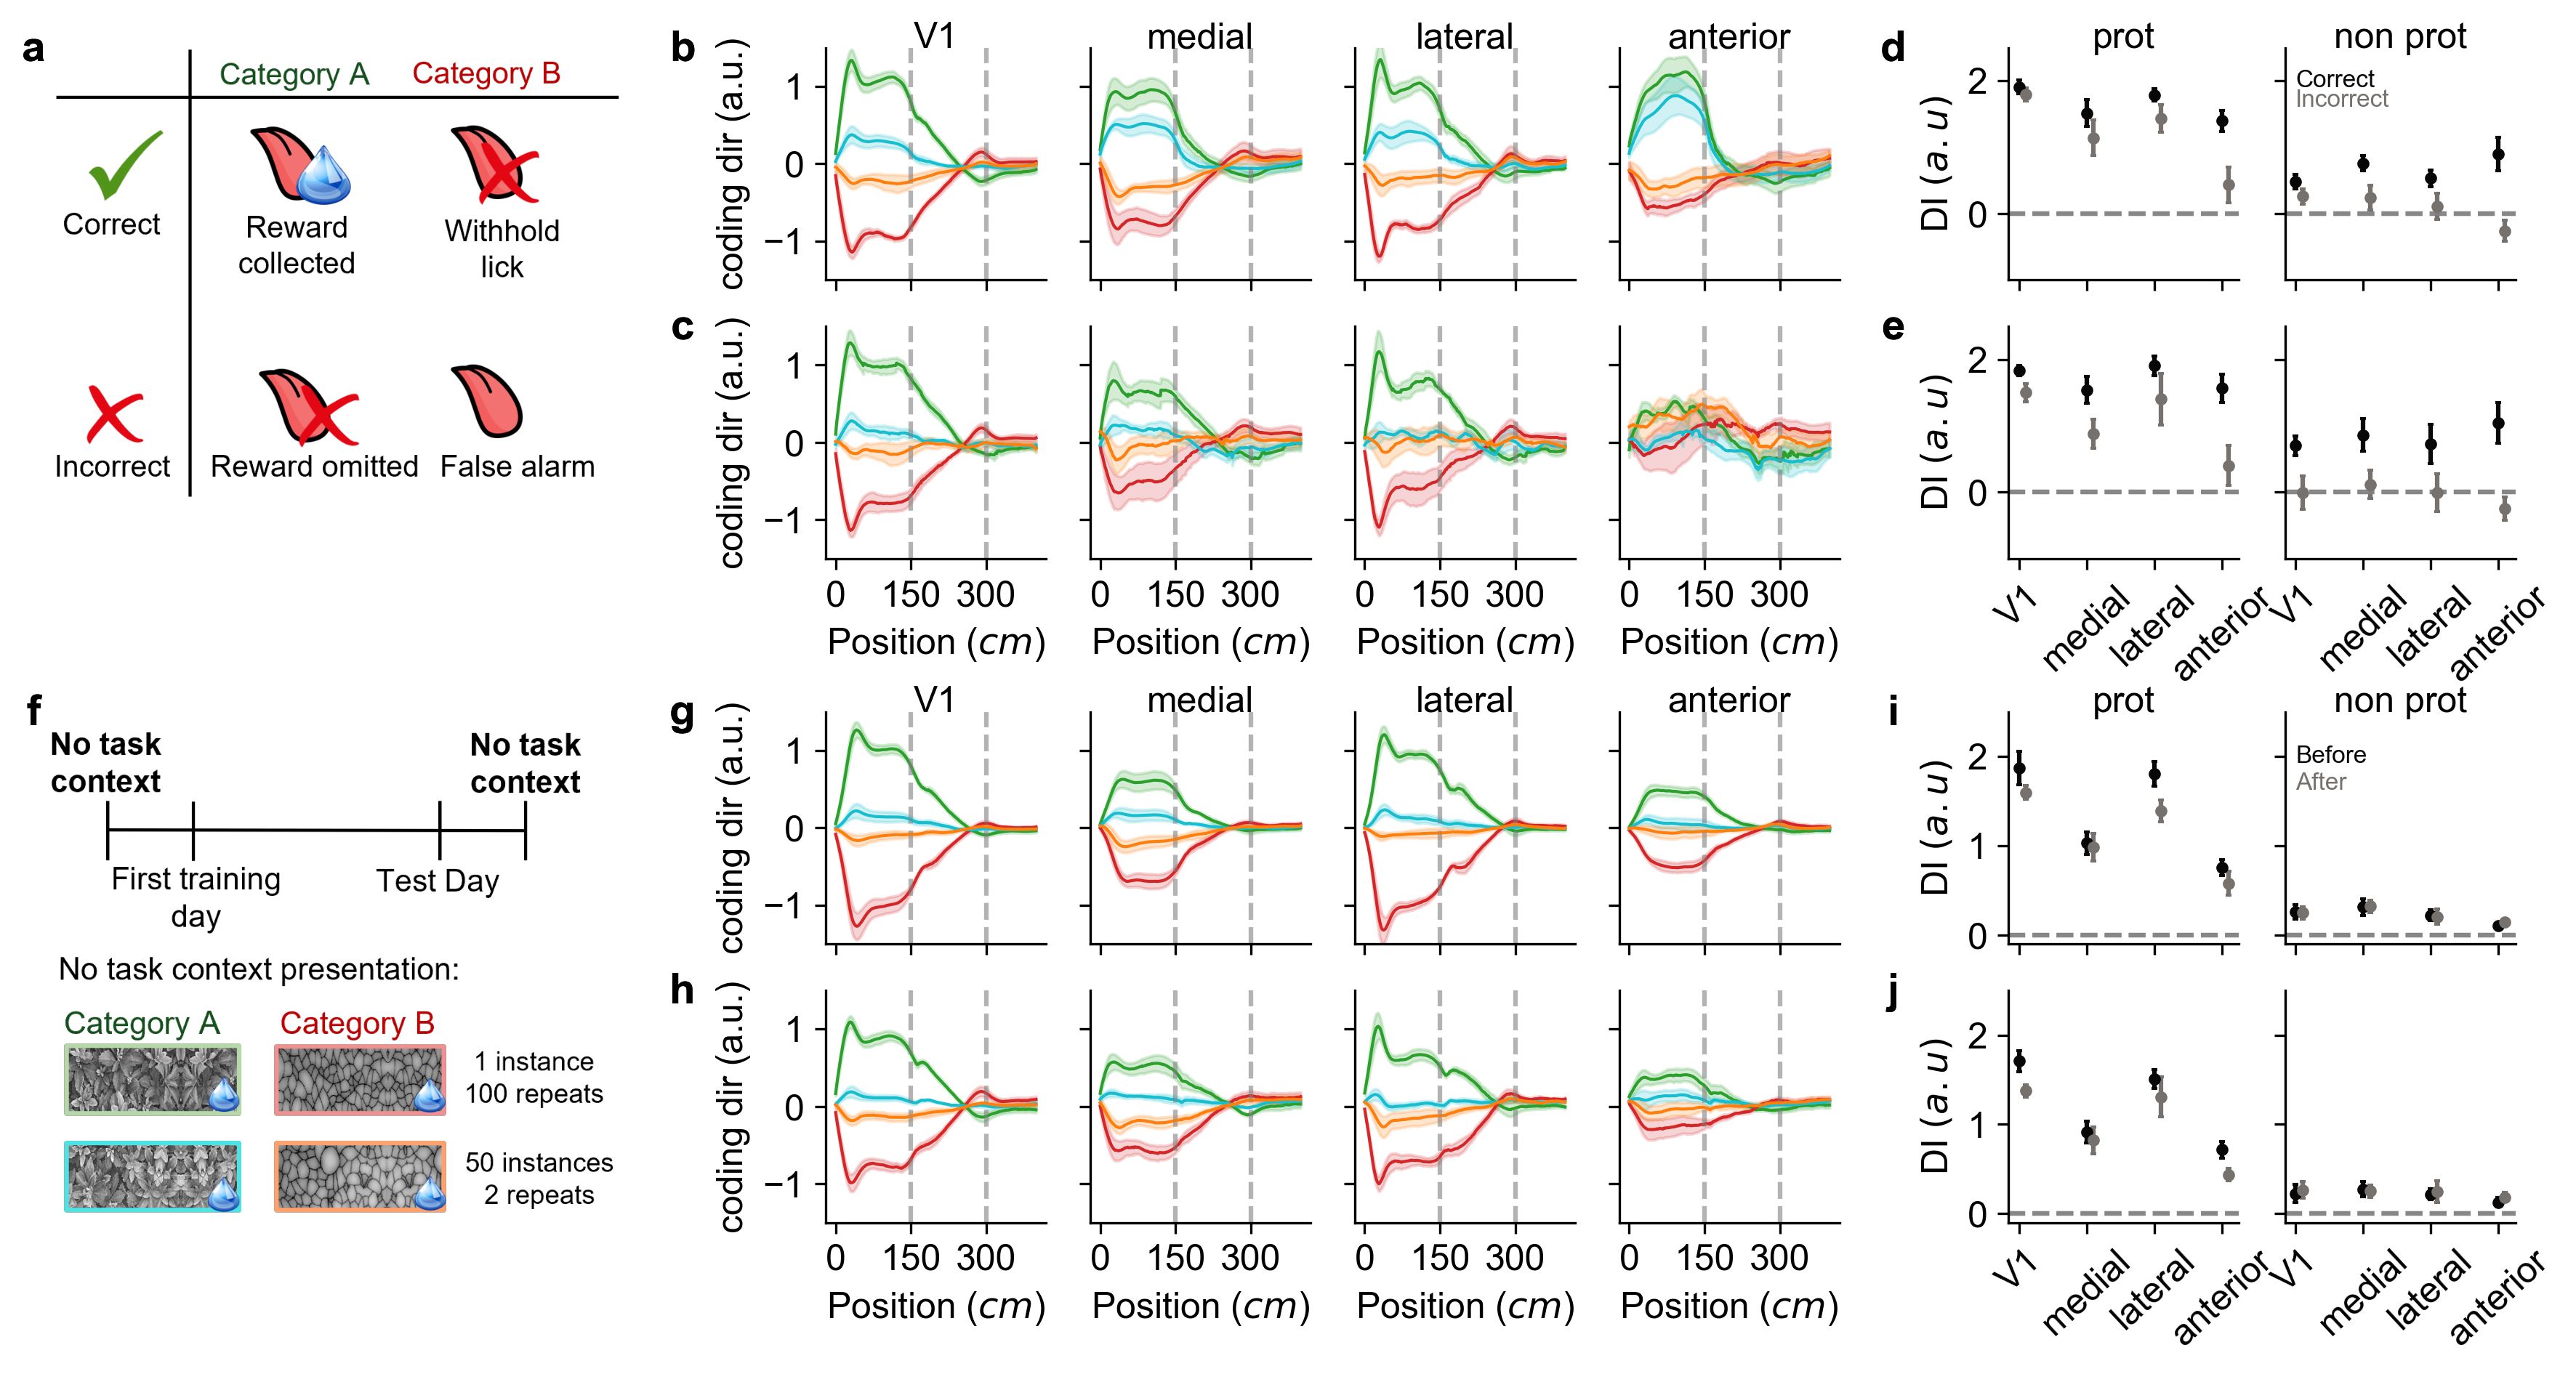

In [5]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(14, 7), dpi=300)
grid = GridSpec(2, 8, wspace=0.4, hspace=0.3, figure=fig)
row1  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[0,:], width_ratios=[.25,.5,.25], wspace=0.25)
row2  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[1,:], width_ratios=[.25,.5,.25], wspace=0.25)
c_i_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row1[0,1])
c_i_axs = c_i_grid.subplots(sharex=True, sharey=True)
all_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row2[0,1])
all_axs = all_grid.subplots(sharex=True, sharey=True)
img0 = fig.add_subplot(row1[0, 0])
di_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=row1[0,2])
di_axs = di_grid.subplots(sharex=True, sharey=True)
img1 = fig.add_subplot(row2[0, 0])
comp_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=row2[0,2])
comp_ax = comp_grid.subplots(sharex=True, sharey=True)


for iday, day_response in enumerate([correct, incorrect]):
    for a, area in enumerate(areas):
        c_i_axs[iday,a].set_ylim(-1.5,1.5)
        c_i_axs[0,a].tick_params(labelbottom=False)
        c_i_axs[0,a].set_title(f"{areas[a]}", loc='center', size=12, pad=-0.05)
        c_i_axs[1,a].set_xlabel("Position ($cm$)")
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, c_i_axs[iday,a], references=True)
        if iday>0:
            c_i_axs[iday,a].set_xticks([0, 150, 300])
c_i_axs[0,0].set_ylabel('coding dir (a.u.)')
c_i_axs[1,0].set_ylabel('coding dir (a.u.)')


for iday, day_response in enumerate([all_first, all_last]):
    for a, area in enumerate(areas):
        all_axs[iday,a].set_ylim(-1.5,1.5)
        all_axs[0,a].tick_params(labelbottom=False)
        all_axs[0,a].set_title(f"{areas[a]}", loc='center', size=12, pad=-0.05)
        all_axs[1,a].set_xlabel("Position ($cm$)")
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, all_axs[iday,a], references=True)
        if iday>0:
            all_axs[iday,a].set_xticks([0, 150, 300])
all_axs[0,0].set_ylabel('coding dir (a.u.)')
all_axs[1,0].set_ylabel('coding dir (a.u.)')

#fig2.plot_gi_comparison(gis_all_first, gis_all_last, labels=("all rewarded first", "all rewarded last"), ax=comp_ax)

cell_types = ['Excitatory', 'Inhibitory']
positions = (0, 100)
from scipy.stats import sem
for ctype in range(2):
    for area in range(4):
        correct_sep_pr, incorrect_sep_pr = fig2.get_di(all_first, all_last, area, ctype, type="prot", pos=positions)
        prot_sep = (correct_sep_pr, incorrect_sep_pr)
        correct_sep_rest, incorrect_sep_rest = fig2.get_di(all_first, all_last, area, ctype, type="non prot", pos=positions)
        test_sep = (correct_sep_rest, incorrect_sep_rest)
        for iff, eff in enumerate([prot_sep, test_sep]):
            c_eff = eff[0].mean()
            c_sem_eff = sem(eff[0])
            i_eff = eff[1].mean()
            i_sem_eff = sem(eff[1])
            comp_ax[ctype, iff].errorbar(area, c_eff, yerr=c_sem_eff, fmt='o', capsize=1, markersize=3, color="#070707")
            comp_ax[ctype, iff].errorbar(area+.1, i_eff, yerr=i_sem_eff, fmt='o', capsize=1, markersize=3, color= "#76716d")
            comp_ax[ctype, iff].set_ylim(-.1, 2.5)
            comp_ax[0, iff].set_title(f"{['prot', 'non prot'][iff]}", loc='center', size=12, pad=-0.05)
            comp_ax[1, iff].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'], rotation=43)
            comp_ax[ctype, iff].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
            comp_ax[ctype, 0].set_ylabel(f'DI $(a.u)$')
comp_ax[0,1].text(0, 2, 'Before', ha='left', va='center', color="#070707", size=8)
comp_ax[0,1].text(0, 1.7, 'After', ha='left', va='center', color="#76716d", size=8)


for ctype in range(2):
    for area in range(4):
        correct_sep_pr, incorrect_sep_pr = fig2.get_di(correct, incorrect, area, ctype, type="prot", pos=positions)
        prot_sep = (correct_sep_pr, incorrect_sep_pr)
        correct_sep_rest, incorrect_sep_rest = fig2.get_di(correct, incorrect, area, ctype, type="non prot", pos=positions)
        test_sep = (correct_sep_rest, incorrect_sep_rest)
        for iff, eff in enumerate([prot_sep, test_sep]):
            c_eff = eff[0].mean()
            c_sem_eff = sem(eff[0])
            i_eff = eff[1].mean()
            i_sem_eff = sem(eff[1])
            di_axs[ctype, iff].errorbar(area, c_eff, yerr=c_sem_eff, fmt='o', capsize=1, markersize=3, color="#070707")
            di_axs[ctype, iff].errorbar(area+.1, i_eff, yerr=i_sem_eff, fmt='o', capsize=1, markersize=3, color= "#76716d")
            di_axs[ctype, iff].set_ylim(-1, 2.5)
            di_axs[0, iff].set_title(f"{['prot', 'non prot'][iff]}", loc='center', size=12, pad=-0.05)
            di_axs[1, iff].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'], rotation=43)
            di_axs[ctype, iff].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
            di_axs[ctype, 0].set_ylabel(f'DI $(a.u)$')


            #axes[ctype].set_ylim(-.2, 1)
di_axs[0,1].text(0, 2, 'Correct', ha='left', va='center', color="#070707", size=8)
di_axs[0,1].text(0, 1.7, 'Incorrect', ha='left', va='center', color="#76716d", size=8)

fig2.show_image(img0, r"C:\Users\labadmin\Pictures\ci.png")
fig2.move_axis(img0, hdx=-.04, vdx=-.005, widthdx=1.2, heightdx=1.2)

fig2.show_image(img1, r"C:\Users\labadmin\Pictures\allrew.png")
fig2.move_axis(img1, hdx=-.04, vdx=-.03, widthdx=1.2, heightdx=1.2)
fig2.add_panel_label(img0, 'a', x=0.01, y=0.9876, size=fs_title, weight='bold')
fig2.add_panel_label(c_i_axs[0,0], 'b', x=-0.65, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(di_axs[0,0], 'd', x=-0.5, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(c_i_axs[1,0], 'c', x=-0.65, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(di_axs[1,0], 'e', x=-0.5, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(img1, 'f', x=0.01, y=1.0007, size=fs_title, weight='bold')
fig2.add_panel_label(all_axs[0,0], 'g', x=-0.65, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(comp_ax[0,0], 'i', x=-0.5, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(comp_ax[1,0], 'j', x=-0.5, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(all_axs[1,0], 'h', x=-0.65, y=0.99, size=fs_title, weight='bold')
plt.savefig(r"C:\Users\labadmin\Documents\category-neural\results\figure5.pdf", bbox_inches='tight', dpi=300)

In [6]:
# Suppose you have a Text object
txt = di_axs[0, 0].text(0.5, 0.5, "Example", transform=di_axs[0, 0].transAxes)

# Get its position in axes coordinates
x_axes, y_axes = txt.get_position()

# Transform to figure coordinates
display_coord = di_axs[0, 0].transAxes.transform((x_axes, y_axes))
figure_coord = fig.transFigure.inverted().transform(display_coord)

print("Figure-relative coordinates:", figure_coord)

Figure-relative coordinates: [0.77167208 0.80391304]


In [7]:
grouped = pd.read_csv(r"C:\Users\labadmin\Documents\oneshot-neural\results\invariancebygroup_arealayer.csv", index_col=0)
l1 = grouped.loc[grouped["layer"]==1]
l2 = grouped.loc[grouped["layer"]==2]
normal = grouped.loc[grouped["Rearing"]=="Normal"]
first_training = np.load(main_dir/"first_training"/"cod_dirs_0_100_updated.npy")
last_training = np.load(main_dir/"last_training"/"cod_dirs_0_100_updated.npy")

In [8]:
normal = grouped.query("Rearing == 'Normal' & layer == 2").reset_index(drop=True)
dark = grouped.query("Rearing == 'Dark reared' & layer == 2").reset_index(drop=True)

In [9]:
passive = normal.groupby("area").mean(numeric_only=True).reindex(["V1", "medial", "lateral","anterior"])["pair_invariance"].values
dark_inv = dark.groupby("area").mean(numeric_only=True).reindex(["V1", "medial", "lateral","anterior"])["pair_invariance"].values
all_rew = gis_all_first.mean(0)[:,0]
first_training_gi, _, _ = fig2.compute_gi(first_training, 100)
first_training_inv = first_training_gi.mean(0)[:,0]
last_training_gi, _, _ = fig2.compute_gi(last_training, 100)
last_training_inv = last_training_gi.mean(0)[:,0]
all_rew_last = gis_all_last.mean(0)[:,0]

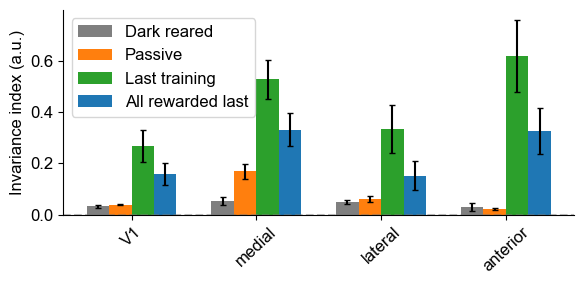

In [10]:
from scipy.stats import sem

# Compute SEM for each quantity per area
areas_order = ["V1", "medial", "lateral", "anterior"]

# Passive and dark_inv SEMs (groupby mouse, per area)
passive_sem = normal.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
passive_err = normal.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

dark_df = grouped.query("Rearing == 'Dark reared' & layer == 2")
dark_inv = dark_df.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
dark_err = dark_df.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

# last_training_inv and all_rew_last SEMs (from arrays)
last_training_err = sem(last_training_gi[:, :, 0], axis=0)
all_rew_last_err = sem(gis_all_last[:, :, 0], axis=0)

x = np.arange(len(areas_order))
width = 0.18

plt.figure(figsize=(6, 3))
plt.bar(x - 1.5*width, dark_inv, width, yerr=dark_err, label='Dark reared', color='tab:gray', capsize=2)
plt.bar(x - 0.5*width, passive, width, yerr=passive_err, label='Passive', color='tab:orange', capsize=2)
plt.bar(x + 0.5*width, last_training_inv, width, yerr=last_training_err, label='Last training', color='tab:green', capsize=2)
plt.bar(x + 1.5*width, all_rew_last, width, yerr=all_rew_last_err, label='All rewarded last', color='tab:blue', capsize=2)
plt.xticks(x, areas_order, rotation=43)
plt.ylabel('Invariance index (a.u.)')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

In [12]:
first_training_inv

array([0.1550993 , 0.33122476, 0.14382071, 0.16180446])

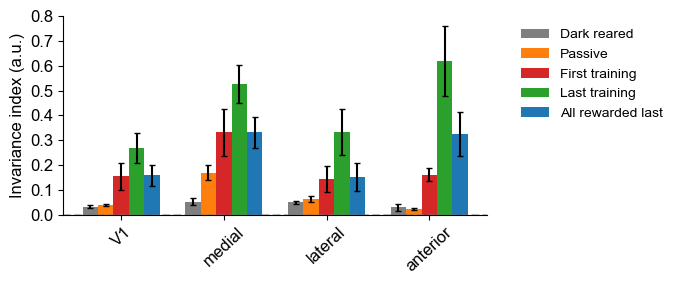

In [14]:
from scipy.stats import sem

# Compute SEM for each quantity per area
areas_order = ["V1", "medial", "lateral", "anterior"]

# Passive and dark_inv SEMs (groupby mouse, per area)
passive_sem = normal.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
passive_err = normal.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

dark_df = grouped.query("Rearing == 'Dark reared' & layer == 2")
dark_inv = dark_df.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
dark_err = dark_df.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

# last_training_inv and all_rew_last SEMs (from arrays)
last_training_err = sem(last_training_gi[:, :, 0], axis=0)
all_rew_last_err = sem(gis_all_last[:, :, 0], axis=0)

# first_training_inv and its SEM
first_training_gi, _, _ = fig2.compute_gi(first_training, 100)
first_training_inv = first_training_gi.mean(0)[:,0]
first_training_err = sem(first_training_gi[:, :, 0], axis=0)

x = np.arange(len(areas_order))
width = 0.15  # Reduce width to fit 5 bars

plt.figure(figsize=(7, 3))
plt.bar(x - 2*width, dark_inv, width, yerr=dark_err, label='Dark reared', color='tab:gray', capsize=2)
plt.bar(x - width, passive, width, yerr=passive_err, label='Passive', color='tab:orange', capsize=2)
plt.bar(x, first_training_inv, width, yerr=first_training_err, label='First training', color='tab:red', capsize=2)
plt.bar(x + width, last_training_inv, width, yerr=last_training_err, label='Last training', color='tab:green', capsize=2)
plt.bar(x + 2*width, all_rew_last, width, yerr=all_rew_last_err, label='All rewarded last', color='tab:blue', capsize=2)
plt.xticks(x, areas_order, rotation=43)
plt.ylabel('Invariance index (a.u.)')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=False)
plt.yticks(np.arange(0, .9, 0.1))
plt.tight_layout()

Text(1.5, 0.27, 'Passive')

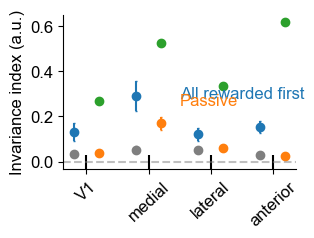

In [16]:
plt.figure(figsize=(3, 2))
for i, area in enumerate(areas):
    plt.scatter(i-0.2, all_rew[i], label='All rewarded first', color='tab:blue')
    plt.scatter(i+0.2, passive[i], label='Passive', color='tab:orange')
    plt.scatter(i-0.2, dark_inv[i], label='Dark reared', color='tab:gray')
    plt.scatter(i+0.2, last_training_inv[i], label='Last training', color='tab:green')
    plt.scatter(i, 0, color='black', marker='|', s=100)
    plt.errorbar(i-0.2, all_rew[i], yerr=sem(gis_all_first[:,i,0]), fmt='o', capsize=1, markersize=1, color='tab:blue')
    plt.errorbar(i+0.2, passive[i], yerr=sem(normal.loc[normal["area"]==area].groupby("mouse").mean(numeric_only=True)["pair_invariance"]), fmt='o', capsize=1, markersize=1, color='tab:orange')
    plt.errorbar(i-0.2, dark_inv[i], yerr=sem(dark.loc[dark["area"]==area].groupby("mouse").mean(numeric_only=True)["pair_invariance"]), fmt='o', capsize=1, markersize=1, color='tab:gray')
plt.xticks(np.arange(4), areas, rotation=43);
plt.ylabel('Invariance index (a.u.)')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.text(1.5, 0.3, 'All rewarded first', ha='left', va='center', color='tab:blue')
plt.text(1.5, 0.27, 'Passive', ha='left', va='center', color='tab:orange')